<a href="https://colab.research.google.com/github/MohammedQaraad/DeepleerningTF/blob/master/Razanempsignalclassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from tqdm import tqdm
import tensorflow as tf 

Using TensorFlow backend.


In [1]:
#upload dataset from you PC
from google.colab import files
uploaded = files.upload()

Saving Adata.csv to Adata.csv


In [0]:
import io
data = pd.read_csv(io.BytesIO(uploaded['Adata.csv']))
# Dataset is now stored in a Pandas Dataframe

In [5]:
data.shape
data.head()

,timestamp,emg1,emg2,emg3,emg4,emg5,emg6,emg7,emg8,label
0,1.560000e+15,4,-2,-15,1,2,0,-1,8,0
1,1.560000e+15,-12,-5,-12,-2,0,-1,-4,-26,0
2,1.560000e+15,0,0,12,-2,-3,-1,1,10,0
3,1.560000e+15,-5,-1,0,0,1,0,-2,-24,0
4,1.560000e+15,3,3,10,-1,0,-1,0,12,0


In [0]:
data = data.drop('timestamp',1)

In [7]:
data.shape ,
data.head()

,emg1,emg2,emg3,emg4,emg5,emg6,emg7,emg8,label
0,4,-2,-15,1,2,0,-1,8,0
1,-12,-5,-12,-2,0,-1,-4,-26,0
2,0,0,12,-2,-3,-1,1,10,0
3,-5,-1,0,0,1,0,-2,-24,0
4,3,3,10,-1,0,-1,0,12,0


In [10]:
y = data['label'].values

print(y.shape)
#one hot encoder
y =to_categorical(y)
print(y.shape)
#one shot data 
y[:5]



(19485,)
(19485, 10)


array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
data= data.drop('label',1) #remove label column

In [12]:
data.shape

(19485, 8)

In [13]:
data.head()

,emg1,emg2,emg3,emg4,emg5,emg6,emg7,emg8
0,4,-2,-15,1,2,0,-1,8
1,-12,-5,-12,-2,0,-1,-4,-26
2,0,0,12,-2,-3,-1,1,10
3,-5,-1,0,0,1,0,-2,-24
4,3,3,10,-1,0,-1,0,12


In [15]:
data.tail()

,emg1,emg2,emg3,emg4,emg5,emg6,emg7,emg8
19480,1,-1,-1,26,5,18,70,7
19481,-1,0,0,4,10,-23,-48,-5
19482,-3,-2,2,4,27,-4,0,-4
19483,0,2,-2,2,-11,-10,-26,-6
19484,-1,0,-1,-14,0,6,-9,2


In [0]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(data)

In [17]:
X.shape

(19485, 8)

In [18]:
X[:5]

array([[ 1.28106401, -0.12473494, -1.32221034,  0.11589305,  0.19583335,
         0.01031803, -0.02995701,  1.59654186],
       [-3.15309292, -0.4139148 , -1.04395825, -0.08795025,  0.05051887,
        -0.03379052, -0.28823683, -4.69426969],
       [ 0.17252477,  0.06805163,  1.18205849, -0.08795025, -0.16745284,
        -0.03379052,  0.14222953,  1.9665896 ],
       [-1.21314927, -0.02834165,  0.06905012,  0.04794528,  0.12317611,
         0.01031803, -0.11605028, -4.32422195],
       [ 1.0039292 ,  0.35723149,  0.9965571 , -0.02000248,  0.05051887,
        -0.03379052,  0.05613626,  2.33663734]])

In [0]:
#do dataset shuffle 
from sklearn.utils import shuffle
shuffleData , shuffleLabel  = shuffle(X,y) 

In [0]:
X_train, X_test, y_train, y_test = train_test_split(shuffleData, shuffleLabel, random_state=42, test_size=0.2)


In [26]:
X_train[:2] , y_test[:2]

(array([[ 0.72679439, -0.4139148 , -0.30195267, -0.29179354,  1.57632088,
          4.42117303, -0.80479646, -0.06867296],
        [-0.38174484,  0.06805163,  0.44005291,  0.11589305, -0.31276732,
          0.05442658,  0.05613626,  0.11635091]]),
 array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32))

In [21]:
np.random.seed(7)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(20,input_dim=8,activation='relu'))
model.add(tf.keras.layers.Dense(12, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))




W0628 21:20:29.454086 139833143781248 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                180       
_________________________________________________________________
dense_1 (Dense)              (None, 12)                252       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                130       
Total params: 562
Trainable params: 562
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])


In [28]:
history = model.fit(X_train,y_train, epochs=20 , batch_size=50 , validation_data=(X_test, y_test) )

Train on 15588 samples, validate on 3897 samples
Epoch 1/20
15588/15588 [==============================] - 1s 37us/sample - loss: 0.2310 - acc: 0.9076 - val_loss: 0.2323 - val_acc: 0.9082
Epoch 2/20
15588/15588 [==============================] - 1s 34us/sample - loss: 0.2295 - acc: 0.9081 - val_loss: 0.2307 - val_acc: 0.9092
Epoch 3/20
15588/15588 [==============================] - 1s 33us/sample - loss: 0.2282 - acc: 0.9084 - val_loss: 0.2304 - val_acc: 0.9088
Epoch 4/20
15588/15588 [==============================] - 1s 36us/sample - loss: 0.2273 - acc: 0.9088 - val_loss: 0.2289 - val_acc: 0.9091
Epoch 5/20
15588/15588 [==============================] - 1s 33us/sample - loss: 0.2264 - acc: 0.9091 - val_loss: 0.2285 - val_acc: 0.9086
Epoch 6/20
15588/15588 [==============================] - 0s 31us/sample - loss: 0.2258 - acc: 0.9096 - val_loss: 0.2275 - val_acc: 0.9091
Epoch 7/20
15588/15588 [==============================] - 0s 31us/sample - loss: 0.2251 - acc: 0.9093 - val_loss: 0.2

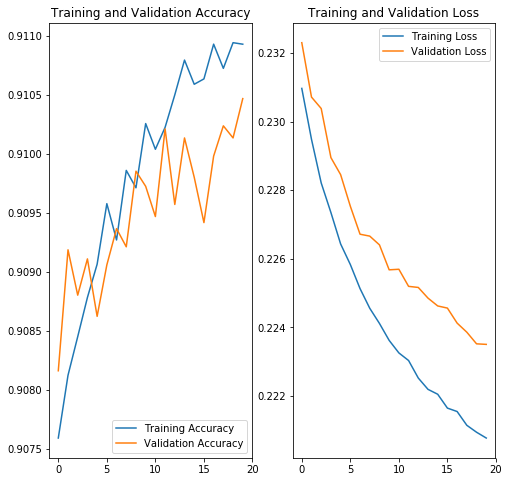

In [30]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('./foo.png')
plt.show()